# Introduction

The ds_salaries dataset provides a comprehensive overview of data science job salaries across different locations, companies, and job titles, offering valuable insights into the current landscape of this rapidly evolving domain.We will examine various factors such as job titles, company locations, and years of experience to gain a deeper understanding of how these elements influence compensation. 

# Importing libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [32]:
df=pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


# Checking for null values

In [36]:
df.isna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3750,False,False,False,False,False,False,False,False,False,False,False
3751,False,False,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,False,False,False,False,False,False,False
3753,False,False,False,False,False,False,False,False,False,False,False


* there is no null value

# Data Processing

In [38]:
df.drop(columns=['salary','salary_currency'],inplace=True)

In [40]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


# Data Visualisation

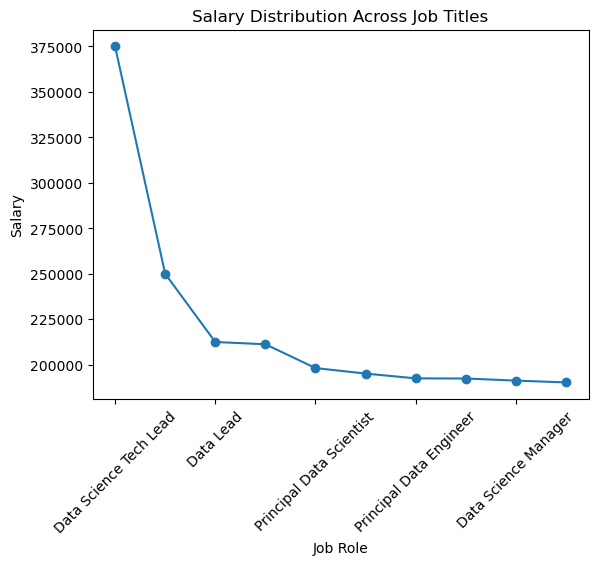

In [71]:
df.groupby(['job_title'])['salary_in_usd'].mean().sort_values(ascending=False).head(10).plot(kind='line',marker='o')
plt.xticks(rotation=45)
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job Role')
plt.ylabel('Salary')
plt.show()

* The plot shows increasing demand for Data Science Tech Lead as compared to Data Science Manager

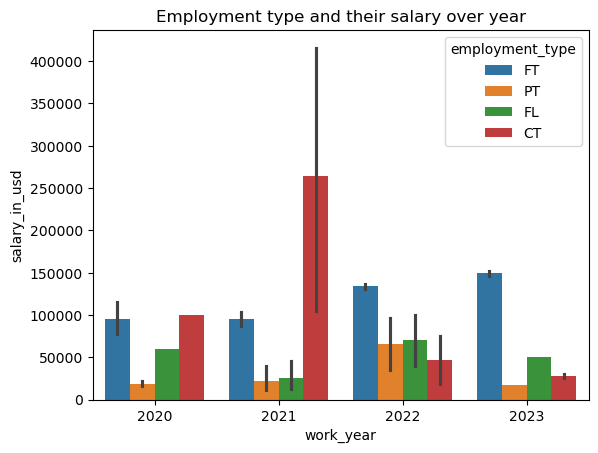

In [93]:
sns.barplot(x='work_year',y='salary_in_usd',data=df,hue='employment_type')
plt.title('Employment type and their salary over year')
plt.show()

* In 2021 ,contract type employment was prefered with high salary
* But the demand decreases when it comes to 2023
* There is a slight increase in salaries for Full-Time employees from 2021 to 2023, suggesting that full-time roles are becoming more lucrative over time.
  
  

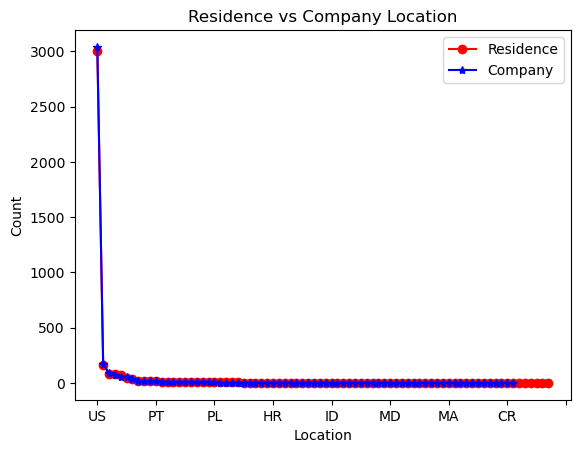

In [105]:
df['employee_residence'].value_counts().plot(kind='line',marker='o',color='red')
df['company_location'].value_counts().plot(kind='line',marker='*',color='b')
plt.legend(['Residence','Company'])
plt.title('Residence vs Company Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

* This indicates most of the professional reside and work in same location
* Both the residence and company location data show significant concentration in US with highest count as compared to other location highlighting the dominance of US in job market


In [108]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


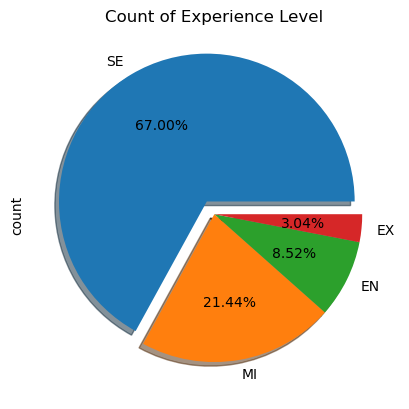

In [114]:
df['experience_level'].value_counts().plot(kind='pie',explode=[0.1,0,0,0],shadow=True,autopct='%1.2f%%')
plt.title('Count of Experience Level')
plt.show()

* this plot shows the count of experience levelo of employee.
* most of the employee are senior level shows each job role needs experienced candidates


<Axes: xlabel='work_year'>

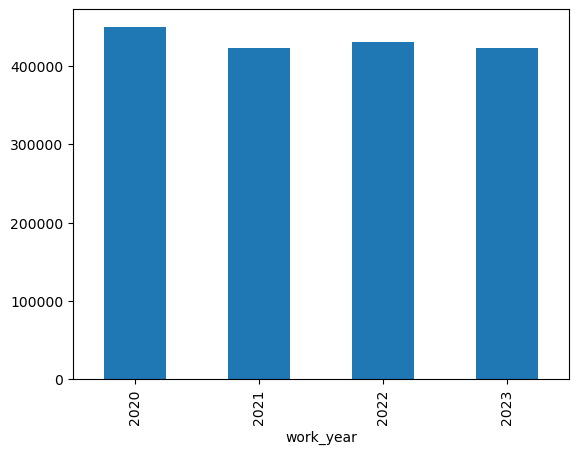

In [121]:
df.groupby(['work_year'])['salary_in_usd'].max().plot(kind='bar')
plt.title('Work year vs Salary')

* In 2020 ,salary offered was a slight large as compared to other years 

<Axes: xlabel='salary_in_usd', ylabel='company_size'>

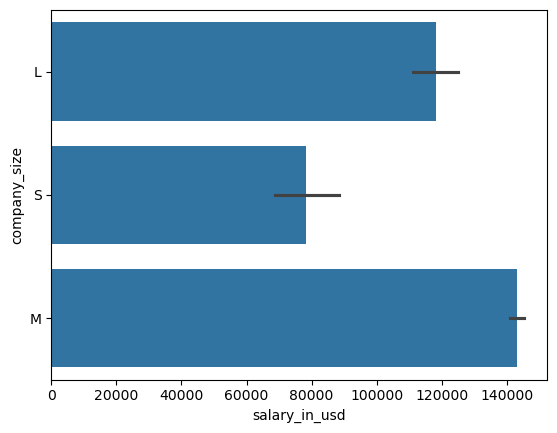

In [136]:
sns.barplot(x='salary_in_usd',y='company_size',data=df)

* Most of the employees are working in medium sized company

<Axes: ylabel='salary_in_usd'>

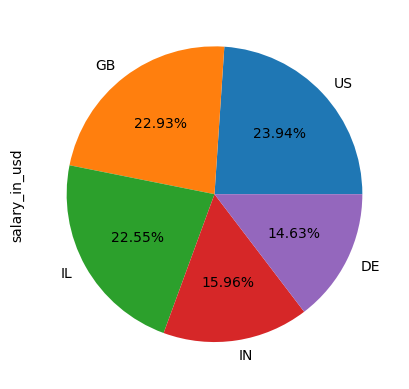

In [152]:
df.groupby(['company_location'])['salary_in_usd'].max().sort_values(ascending=False).head(5).plot(kind='pie',autopct='%1.2f%%')

* top five country providing highest salary

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

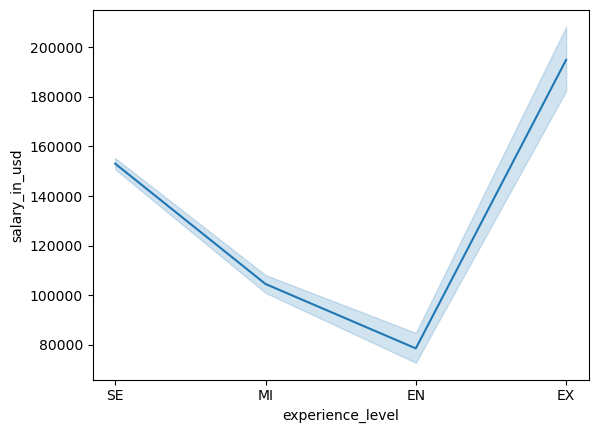

In [148]:
sns.lineplot(x='experience_level',y='salary_in_usd',data=df)

* Executive level provide more salary
* Entry level employe has less salary

<Axes: xlabel='work_year', ylabel='remote_ratio'>

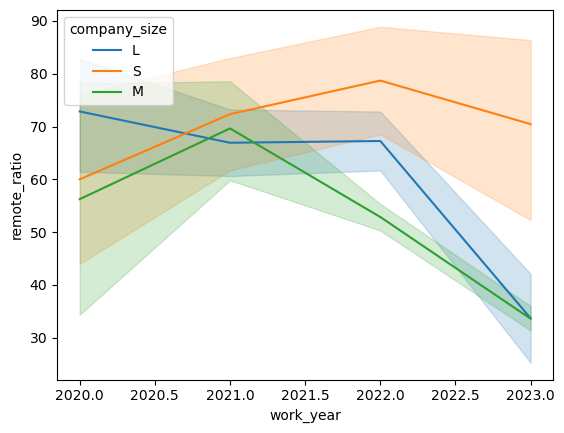

In [156]:
sns.lineplot(x='work_year',y='remote_ratio',data=df,hue='company_size')

* large companies decreased the remote ratio
* small companies increased the remote ratio as year goes
